# Einführung Pandas

**Inhalt:** Pandas kennenlernen

**Nötige skills**: Keine

**Lerniziele**:
- Eine erste Idee erhalten: Wozu ist Pandas gut?

### Was ist Pandas?
Kurz gesagt: Pandas ist Excel für Python.

Das Modul ermöglicht ähnliche Operationen wie ein Tabellenkalkulationsprogramm, aber
- in Logbuchform statt als Tabellenblatt
- mit reproduzierbarem Code
- viel mehr Funktionalität
- kombinierbar mit anderen Modulen
- mit der Funktion, Daten zu exportieren

Ohne Pandas (fast) kein Datenjournalismus mit Python.

### Installation
Command line: `pip install pandas`

...

...

... und wenn das alles geklappt hat:

In [4]:
import pandas as pd

In [5]:
%matplotlib inline

In [6]:
print ("Hooray!")

Hooray!


# Das Beispiel

**Corona-Fälle**: Die Johns Hopkins University hat eine globale Datenbank aufgebaut: https://coronavirus.jhu.edu/map.html

Die Daten dazu sind auf Github abgelegt: https://github.com/CSSEGISandData/COVID-19/

Wir schauen uns die Daten an, lernen ein paar Analysemöglichkeiten kennen und bauen die Charts für folgende Story nach: https://www.republik.ch/2020/07/20/in-schwellenlaendern-beginnt-die-covid-krise-gerade-erst-so-richtig

## Daten laden

Pandas kann lokale Datenquellen wie Excelfiles oder csv-Dateien laden. Praktisch: Man kann die Dateien auch direkt aus dem Netz holen.

Wir holen uns zwei verschiedene Datensets:
- eines mit den Fallzahlen
- eines mit den Todeszahlen

Vorhanden sind diese Länder jeweils für Länder und ihre Provinzen. Die Zahlen sind **kumuliert über die Zeit** angegeben.

**Fallzahlen**

In [7]:
path = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [8]:
df_cases = pd.read_csv(path)

In [9]:
df_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335


**Todeszahlen**

In [10]:
path = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [11]:
df_deaths = pd.read_csv(path)

In [12]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1409,1409,1409,1412,1415,1418,1420,1420,1420,1420
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,301,306,312,316,319,321,322,324,327,330
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1529,1539,1549,1556,1562,1571,1581,1591,1599,1605
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,113,115,117,117,120,124,126,130,131,132


### Mögliche Fragestellungen

Bevor wir mit dem Beispiel beginnen, lasst uns kurz nachdenken:
- Was könnten interessante Fragestellungen sein, die sich mit diesem Datensatz beantworten lassen?
- Was für interessante Analysen könnten wir mit den Daten machen?
- An was für Grafiken könnten wir interessiert sein?

In [13]:
# Platz zum Antworten aufschreiben

### Unsere Fragestellung

In diesem Notebook schauen wir uns zwei Anwendungen an:
1. Inzidenzkurve für verschiedene Länder: Welche Dynamik hat die Epidemie in der Schweiz, in den USA, in Finnland, etc.?
1. Verlauf der Epidemie nach Ländergruppen: An welchem Punkt stehen die Industrieländer, Schwellenländer, Entwicklungsländer?

## Daten arrangieren

Bevor wir mit den Daten arbeiten können, müssen wir sie noch etwas arrangieren.

**Fallzahlen**

Zuerst schmeissen wir ein paar überflüssige Angaben raus, die uns nicht interessieren...

In [14]:
df_cases = df_cases.drop(columns=['Province/State', 'Lat', 'Long'])

Danach gruppieren wir die Daten nach Land und geben den Datumsangaben ein richtiges Format...

In [15]:
df_cases = df_cases.groupby('Country/Region').sum().T
df_cases.index = pd.to_datetime(df_cases.index, format='%m/%d/%y')

Und schliesslich bilden wir die täglichen Differenzen...

In [16]:
df_cases = df_cases.diff()[1:]
df_cases.index.name = 'date'
df_cases = df_cases.astype(int)

Nun haben wir ein "sauberes" Datenset:

In [17]:
df_cases.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-09-08,26,147,285,0,52,0,12027,108,92,520,...,2481,19,388,1213,5,584,0,5,116,90
2020-09-09,24,151,278,40,59,0,12259,199,59,502,...,2681,29,649,1188,5,556,0,5,160,41
2020-09-10,28,156,272,0,125,0,11905,174,40,664,...,2931,18,543,1072,0,745,0,4,102,24
2020-09-11,34,161,264,43,62,0,11507,177,43,580,...,3544,14,687,840,1,592,0,4,109,26
2020-09-12,35,164,255,0,56,0,10776,172,44,869,...,3504,7,561,967,0,650,0,2,143,29


Zur Vorbereitung für später kreieren wir gleich noch zwei weitere Datensets:
- eines mit dem gleitenden Mittelwert über sieben Tage hinweg
- eines mit dem wöchentlichen Mittelwert (das ist nicht dasselbe!)

In [18]:
df_cases_r = df_cases.rolling(7).mean()

In [19]:
df_cases_w = df_cases.resample('W').sum()

**Todesfälle**

Mit den Todesfällen machen wir genau dasselbe

In [20]:
df_deaths = df_deaths.drop(columns=['Province/State', 'Lat', 'Long'])
df_deaths = df_deaths.groupby('Country/Region').sum().T
df_deaths.index = pd.to_datetime(df_deaths.index, format='%m/%d/%y')

In [21]:
df_deaths = df_deaths.diff()[1:]
df_deaths.index.name = 'date'
df_deaths = df_deaths.astype(int)

In [22]:
df_deaths_r = df_deaths.rolling(7).mean()

In [23]:
df_deaths_w = df_deaths.resample('W').sum()

## 1. Verlauf in einzelnen Ländern

Pandas ist ein praktisches Tool, um explorative Datenanalysen durchzuführen - und logbuchartig festzuhalten, was dabei rauskommt.

Wir können zum Beispiel mal die Covid-Fallzahlen-Kurve in der Schweiz rausziehen und diese mit einer einfachen Codezeile auch gleich plotten:

In [24]:
df_cases['Switzerland']

date
2020-01-23      0
2020-01-24      0
2020-01-25      0
2020-01-26      0
2020-01-27      0
             ... 
2020-09-08    245
2020-09-09    469
2020-09-10    405
2020-09-11    528
2020-09-12    465
Name: Switzerland, Length: 234, dtype: int64

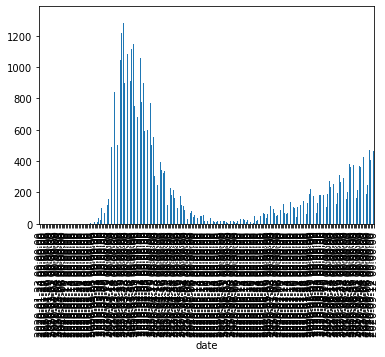

In [25]:
df_cases['Switzerland'].plot(kind='bar')

### Schöne Plots

Leider sehen die Standardplots manchmal etwas hässlich aus.

Wir können - sofern wir Zeit haben - uns den Plot mit ein paar Codezeilen etwas verschönern.

Dazu brauchen wir zuerst noch ein paar weitere Bibliotheken.

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [27]:
%matplotlib inline

Es gibt unzählige Sachen, die man an einem Chart einstellen kann, bis er "schön" ist:
- Einen aussagekräftigen Titel
- Die Achsenbeschriftungen und Labels ("Ticks")
- mehrere Charts nebeneinander
- mehrere Elemente in einem Chart (zB Trendlinien)
- ...

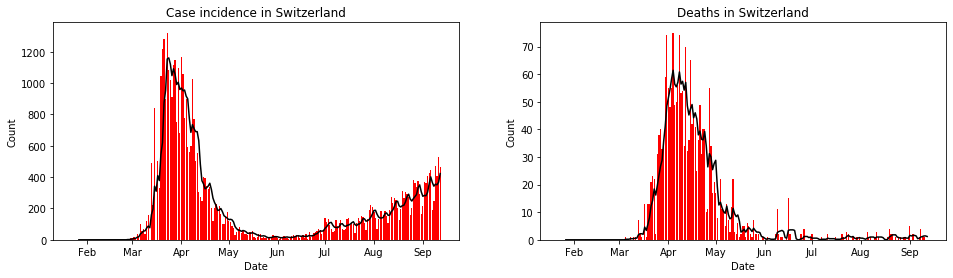

In [28]:
country = 'Switzerland'
color='red'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = df_cases
ax1.bar(data.index, data[country], color=color)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.set_title('Case incidence in ' + country)
ax1.set_ylabel('Count')
ax1.set_xlabel('Date')

data = df_cases.rolling(5).mean()
ax1.plot(data.index, data[country], color='black')

data = df_deaths
ax2.bar(data.index, data[country], color=color)
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax2.set_title('Deaths in ' + country)
ax2.set_ylabel('Count')
ax2.set_xlabel('Date')

data = df_deaths.rolling(5).mean()
ax2.plot(data.index, data[country], color='black')

Damit wir diesen Code nicht jedesmal neu schreiben müssen, bauen wir uns eine Funktion dafür. Wir nennen Sie `countrychart()`. Sie erhält:
- das Land, dessen Kurven wir plotten wollen
- die Farbe

In [30]:
def countrychart(country, color):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

    data = df_cases
    ax1.bar(data.index, data[country], color=color)
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax1.set_title('Case incidence in ' + country)
    ax1.set_ylabel('Count')
    ax1.set_xlabel('Date')
    
    data = df_cases.rolling(5).mean()
    ax1.plot(data.index, data[country], color='black')

    data = df_deaths
    ax2.bar(data.index, data[country], color=color)
    ax2.xaxis.set_major_locator(mdates.MonthLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax2.set_title('Deaths in ' + country)
    ax2.set_ylabel('Count')
    ax2.set_xlabel('Date')
    
    data = df_deaths.rolling(5).mean()
    ax2.plot(data.index, data[country], color='black')

### ein paar Länder...

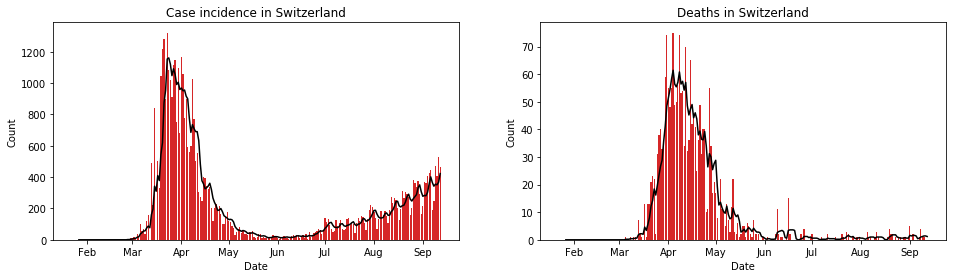

In [31]:
countrychart('Switzerland', 'tab:red')

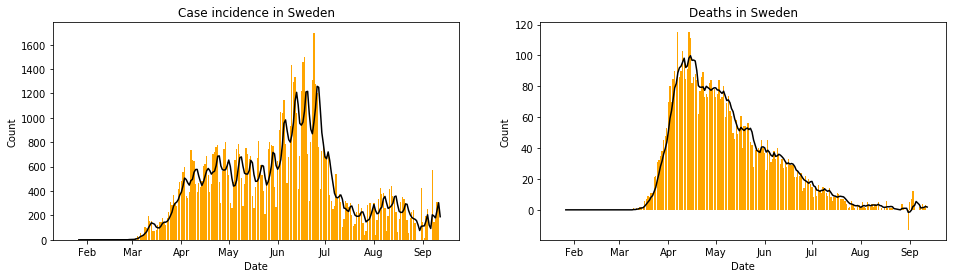

In [40]:
countrychart('Sweden', 'orange')

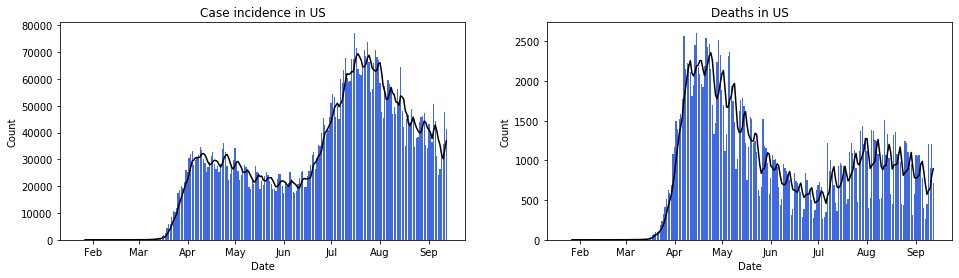

In [34]:
countrychart('US', 'royalblue')

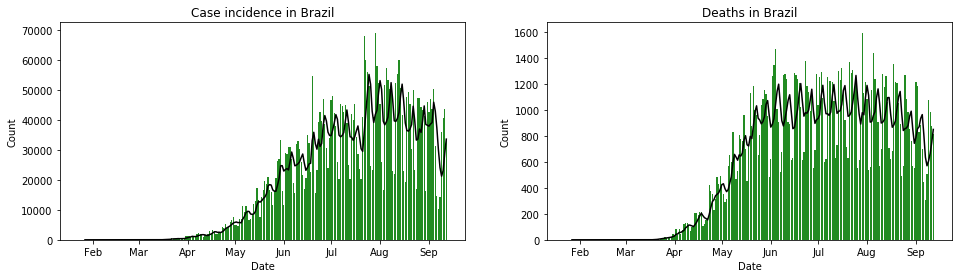

In [36]:
countrychart('Brazil', 'forestgreen')

... etc. Sie können hier weitere Länder ausprobieren.

Eine Liste der Farbnamen gibt es übrigens hier: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

## 2. Ländergruppen

Hier sind die Schritte, mit denen die Charts zur Schwellenländer-Story erstellt wurden.

Wir interessieren uns dabei für das *big picture*, wollen drei Ländergruppen bilden:
- Industrieländer (reiche Länder)
- Schwellenländer (aufsteigende Wirtschaften)
- Entwicklungsländer (arme Länder)

Dazu brauchen wir aber noch eine Zusatzinformation: Welches Land ist in welcher Gruppe?

### Weitere Daten laden

Eine Liste dazu haben wir bereits vorbereitet :-)

In [41]:
path = 'dataprojects/covid/countrylist_categories.xlsx'

In [42]:
df_cat = pd.read_excel(path)

In [43]:
df_cat.head()

,Country/Region,type
0,Afghanistan,E
1,Albania,S
2,Algeria,S
3,Andorra,I
4,Angola,E


### Daten kategorisieren und summieren

Zuerst erstellen wir drei Listen mit allen Ländernamen, die jeweils in eine Kategorie fallen:

In [44]:
cat_E = df_cat[df_cat['type'] == 'E']['Country/Region']
cat_S = df_cat[df_cat['type'] == 'S']['Country/Region']
cat_I = df_cat[df_cat['type'] == 'I']['Country/Region']

In [45]:
cat_E

0         Afghanistan
4              Angola
13         Bangladesh
18              Benin
19             Bhutan
            ...      
182           Vietnam
184    Western Sahara
185             Yemen
186            Zambia
187          Zimbabwe
Name: Country/Region, Length: 64, dtype: object

Danach filtern wir die anhand dieser Liste, summieren sie und bilden drei neue Einträge:

In [48]:
df_cases['Entwicklungsländer'] = df_cases[cat_E].sum(axis=1)
df_cases['Schwellenländer'] = df_cases[cat_S].sum(axis=1)
df_cases['Industrieländer'] = df_cases[cat_I].sum(axis=1)

In [49]:
df_deaths['Entwicklungsländer'] = df_deaths[cat_E].sum(axis=1)
df_deaths['Schwellenländer'] = df_deaths[cat_S].sum(axis=1)
df_deaths['Industrieländer'] = df_deaths[cat_I].sum(axis=1)

### Plotten

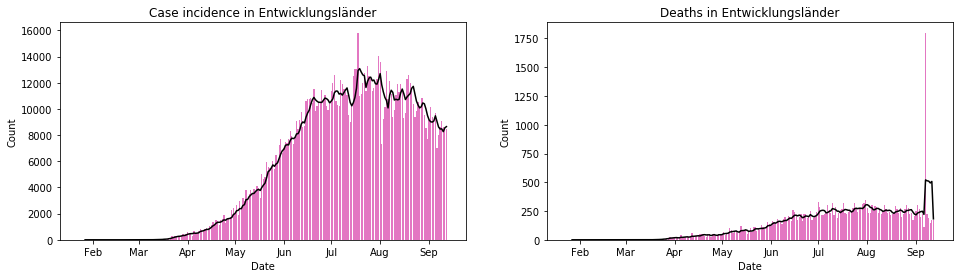

In [50]:
countrychart('Entwicklungsländer', '#e377c2')

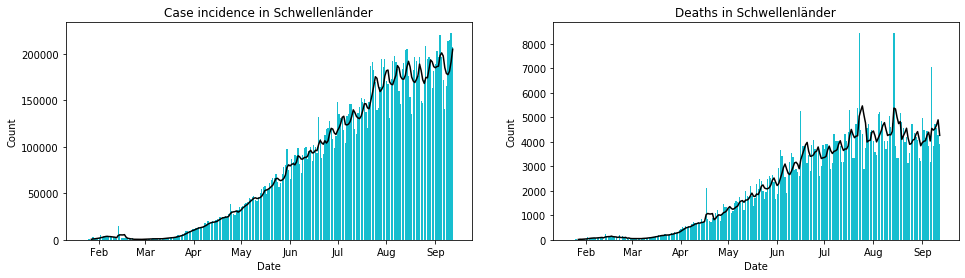

In [51]:
countrychart('Schwellenländer', '#17becf')

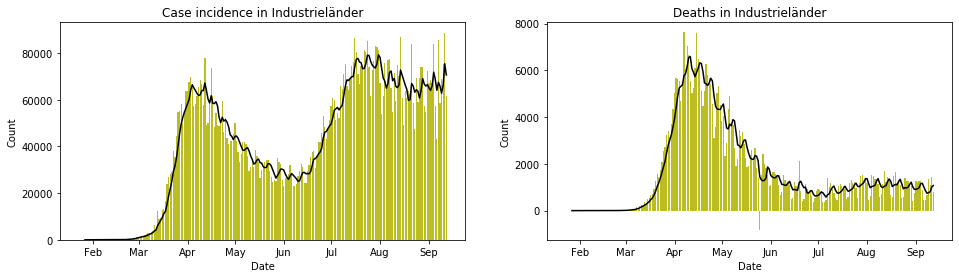

In [52]:
countrychart('Industrieländer', '#bcbd22')

### Varianten ausprobieren

In unserem Onlinecharting-Tool wollen wir die Daten nicht auf Tages-, sondern auf Wochenbasis zeigen.

Weil inzwischen neue Länder dazugekommen sind, müssen wir die Kalkulation nochmals ausführen.

In [53]:
df_cases_w = df_cases.resample('W').sum()
df_deaths_w = df_deaths.resample('W').sum()

Um das schön zu plotten, müssen wir die Funktion leicht anpassen:

In [68]:
def countrychart_weekly(country, color):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

    data = df_cases_w
    ax1.bar(data.index.astype(str), data[country], color=color)
    #ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    #ax1.xaxis.set_major_locator(mdates.MonthLocator())
    #ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    #ax1.set_title('Case incidence in ' + country)
    ax1.set_ylabel('Count')
    ax1.set_xlabel('Date')
    
    data = df_deaths_w
    ax2.bar(data.index.astype(str), data[country], color=color)
    #ax2.xaxis.set_major_locator(mdates.MonthLocator())
    #ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax2.set_title('Deaths in ' + country)
    ax2.set_ylabel('Count')
    ax2.set_xlabel('Date')
    
    fig.autofmt_xdate(rotation=90)

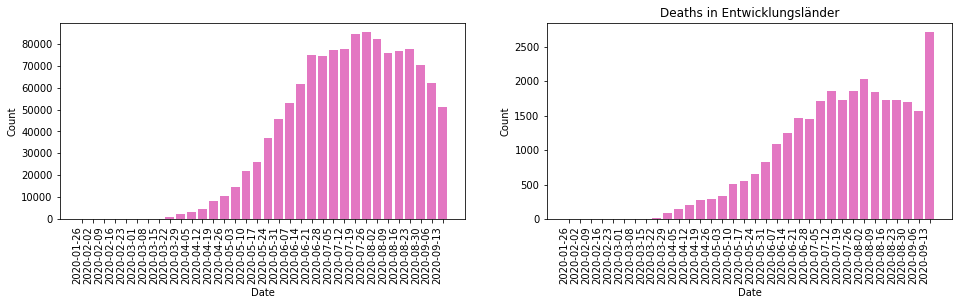

In [69]:
countrychart_weekly('Entwicklungsländer', '#e377c2')

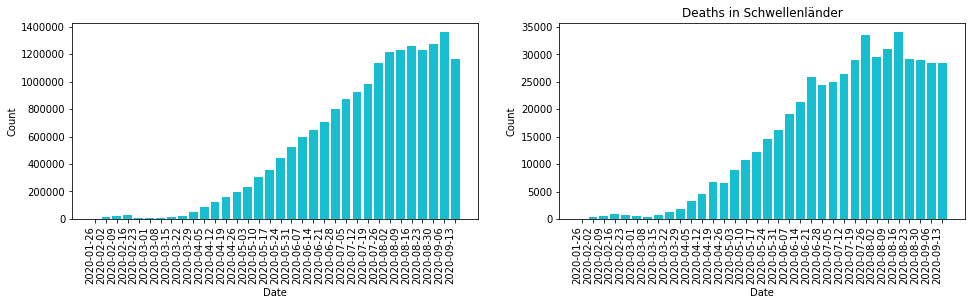

In [70]:
countrychart_weekly('Schwellenländer', '#17becf')

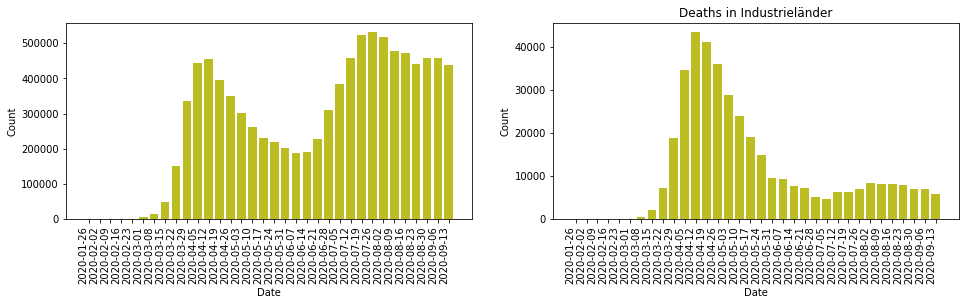

In [71]:
countrychart_weekly('Industrieländer', '#bcbd22')

### Daten exportieren

Um unsere Charts ins Web-CMS zu übernehmen, müssen wir sie in brauchbarer Form exportieren.

Wir wollen drei verschiedene csv-Files haben (je eines pro Ländergruppe).

In [76]:
countries = [
    'Entwicklungsländer',
    'Schwellenländer',
    'Industrieländer'
]

In [77]:
path = 'dataprojects/covid/charts/'

In [78]:
for country in countries:
    df_deaths_w[[country]].round(3).rename(columns={country: 'value'}).to_csv(path + country + '_Fallzahlen.csv')
    df_deaths_w[[country]].round(3).rename(columns={country: 'value'}).to_csv(path + country + '_Todeszahlen.csv')

## Resumé

Wir haben in diesem Notebook gesehen:
- Pandas ist ziemlich praktisch, um Daten direkt aus dem Web abzuzapfen und zu analysieren
- Man kann logbuchartig die Bearbeitung festhalten und dokumentieren
- Die Analyse lässt sich jederzeit wiederholen und updaten
- Es braucht relativ wenig Code, um Daten zu transformieren (zB wöchentliche Summen)
- Plotten in Pandas ist simpel, um ersten Eindruck zu erhalten
- Schöne Plots in Pandas sind aber mühsam (aber meistens auch nicht nötig)

Doch die Einfachheit entbindet uns nicht davon, zu überlegen, ob das, was wir tun, auch sinnvoll ist!

**Frage**: Was sind mögliche Probleme und Fallstricke, die wir bei den obigen Charts haben?

In [80]:
# Platz für Antworten